<a href="https://colab.research.google.com/github/anotidamalandu/BP_public/blob/main/20294469Assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Introduction**

Enron was an energy trading and supplier company based in Houston Texas, United states of America which committed the biggest accounting fraud in history to date. Executives at Enron implemented accounting activities that inflated Enron's revenue falsefully which painted an image that it was The United States' seventh largest company. When the fraudulent activities were uncovered Enron filed for chapter 11 bankruptcy in December 2001, the share price dropped from USD90.75 to USD0.26 when it was revealed (Chen, 2019). Enron was an energy company started in 1985 through a merger between Houston Natural Gas and InterNorth Inc. The company then appointed Kenneth Lay as the CEO and chair. The company was then rebranded to energy trader and supplier by the CEO Kenneth Lay. Enron then took advantage of the deregulations of the energy markets which allowed companies to bet on prices in the future. Enron Finance Corp was created in 1990 and Jeffery Skilling was appointed as the head of that company (Segal, 2021).

In [20]:
import sqlite3

Here I imported Enron data into colab and when it loaded the file appeared in files. I used the connection method and then created a connection object in the directory. Here I then went on to create a cursor object that allows the execution of SQL quires against the database.

In [21]:
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2022-05-29 16:16:40--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2022-05-29 16:16:41--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  78.7MB/s    in 15s     

2022-05-29 16:16:56 (55.8 MB/s) - ‘enron.db’ saved [853819392/853819392]



In [22]:
conn = sqlite3.connect("enron.db")

In [23]:
print(conn.total_changes)

0


In [24]:
cur = conn.cursor()

Here I created the SQL command as a string then went on to execute the command. The CREATE A TABLE IF IT DOES NOT EXSITS function will reconnect the data base and will allow us to check if the table exists and if it does nothing will change. We did this for all the tables we were given. 

In [25]:
sql = """
CREATE TABLE IF NOT EXISTS users(
  eid INT,
  firstName TEXT,
  lastName TEXT,
  Email_id INT PRIMARY KEY,
  Email2 TEXT,
  Email3 TEXT,
  Email4 TEXT,
  folder BLOB,
  status TEXT);
"""
# Execute query and commit transaction
cur.execute(sql)
conn.commit()

In [26]:
rows = cur.execute("SELECT eid, firstName, lastName, Email_id, Email2, Email3,Email4, folder,status FROM employeelist").fetchall()
print(rows)

[(1, 'Robert', 'Badeer', 'robert.badeer@enron.com', 'rbadeer@enron.com', '', '', 'badeer-r', 'Director'), (2, 'Kevin', 'Hyatt', 'kevin.hyatt@enron.com', 'kevin_hyatt@enron.com', 'khyatt@enron.com', '', 'hyatt-k', 'Director'), (3, 'Tracy', 'Geaccone', 'tracy.geaccone@enron.com', 'tracy_geaconne@enron.com', '', '', 'geaccone-t', 'Employee'), (4, 'Teb', 'Lokey', 'teb.lokey@enron.com', 'teb_lokey@enron.com', 'tlokey@enron.com', '', 'lokey-t', 'Manager'), (5, 'Richard', 'Ring', 'richard.ring@enron.com', '', '', '', 'ring-r', 'Employee'), (6, 'Mark', 'Taylor', 'mark.e.taylor@enron.com', 'mark.taylor@enron.com', 'e.taylor@enron.com', '', 'taylor-m', 'Employee'), (7, 'Theresa', 'Staab', 'theresa.staab@enron.com', 'theresa_staab@enron.com', 'tstaab@enron.com', '', 'staab-t', 'Employee'), (8, 'Susan', 'Pereira', 'susan.w.pereira@enron.com', 'w..pereira@enron.com', 'susan.peireira@enron.com', '', 'pereira-s', 'Employee'), (9, 'Stephanie', 'Panus', 'stephanie.panus@enron.com', '', '', '', 'panus-s

In [27]:
sql = """
CREATE TABLE IF NOT EXISTS users(
  mid INT PRIMARY KEY,
  sender TEXT,
  date INT,
  message_id INT,
  subject TEXT,
  body TEXT);
"""
# Execute query and commit transaction
cur.execute(sql)
conn.commit()

In [28]:
sql = """
CREATE TABLE IF NOT EXISTS user(
  rid INT PRIMARY KEY, 
  mid INT,
  rtype TEXT);
"""
# Execute query and commit transaction
cur.execute(sql)
conn.commit()

In [29]:
sql = """
CREATE TABLE IF NOT EXISTS user(
  rfid INT PRIMARY KEY, 
  mid INT);
"""
# Execute query and commit transaction
cur.execute(sql)
conn.commit()

I imported the pandas package to be able to read the SQLite database and load it in  a data frame for both the employee list as well as the message table.

In [30]:
import pandas as pd

sql='''
SELECT * from employeelist;
'''
# Load the data into a DataFrame
users_df = pd.read_sql_query(sql,conn)
users_df

,eid,firstName,lastName,Email_id,Email2,Email3,EMail4,folder,status
0,1,Robert,Badeer,robert.badeer@enron.com,rbadeer@enron.com,,,badeer-r,Director
1,2,Kevin,Hyatt,kevin.hyatt@enron.com,kevin_hyatt@enron.com,khyatt@enron.com,,hyatt-k,Director
2,3,Tracy,Geaccone,tracy.geaccone@enron.com,tracy_geaconne@enron.com,,,geaccone-t,Employee
3,4,Teb,Lokey,teb.lokey@enron.com,teb_lokey@enron.com,tlokey@enron.com,,lokey-t,Manager
4,5,Richard,Ring,richard.ring@enron.com,,,,ring-r,Employee
...,...,...,...,...,...,...,...,...,...
144,146,Steven,South,steven.p.south@enron.com,steven.south@enron.com,p..south@enron.com,,south-s,N/A
145,147,Carol,Clair,carol.clair@enron.com,carol.st.clair@enron.com,carol.stclair@enron.com,,stclair-c,Vice President
146,148,Chris,Stokley,chris.stokley@enron.com,,,,stokley-c,N/A
147,149,Kate,Symes,kate.symes@enron.com,ksymes@enron.com,,,symes-k,Employee


In [31]:
import pandas as pd

sql='''
SELECT * from message;
'''
# Load the data into a DataFrame
users_df = pd.read_sql_query(sql,conn)
users_df

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
...,...,...,...,...,...,...,...
252754,404923,karen.buckley@enron.com,2002-02-06 16:51:29,<16183734.1075840015218.JavaMail.evans@thyme>,URGENT - NEED CONFIRMATION TODAY,X-FileName: Pls confirm at what location (i.e ...,"ExMerge - Dean, CraigInbox"
252755,404924,karen.buckley@enron.com,2002-02-06 17:17:39,<28117049.1075840015191.JavaMail.evans@thyme>,,X-FileName: Craig - I need the date and locati...,"ExMerge - Dean, CraigInbox"
252756,404925,liz.taylor@enron.com,2002-02-06 20:09:37,<32633742.1075840015168.JavaMail.evans@thyme>,Trader Presentations - 2/7 @ 2:30 p.m. (CST) i...,X-FileName: There will be two presentatio...,"ExMerge - Dean, CraigInbox"
252757,404926,pete.davis@enron.com,2002-02-07 04:38:13,<17912146.1075840015125.JavaMail.evans@thyme>,Start Date: 2/7/02; HourAhead hour: 3;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"


in this qury i just showed the date and the number of emails sent during each of the dates in a bid to see one what does were most of the emails sent. I then load the information in a data frame using the panda package to crate a table which has the date and message count

In [32]:
sql = """
SELECT date(date) AS date_sent, count(mid) AS message_count
  FROM message
  GROUP BY date_sent
  ORDER BY date_sent;
"""
rows = cur.execute(sql)
for row in rows :
  print(row)

('0001-05-30', 2)
('0001-06-18', 1)
('0001-07-24', 1)
('0001-08-01', 1)
('0001-08-06', 1)
('0001-08-13', 1)
('0001-08-21', 1)
('0001-08-22', 1)
('0001-08-26', 1)
('0001-08-27', 1)
('0001-08-28', 4)
('0001-08-30', 1)
('0001-09-03', 1)
('0001-09-05', 2)
('0001-09-13', 1)
('0001-09-17', 1)
('0001-09-19', 1)
('0001-09-20', 1)
('0001-09-21', 1)
('0001-09-26', 1)
('0001-10-04', 1)
('0001-10-05', 1)
('0001-10-08', 1)
('0001-10-12', 1)
('0001-10-15', 3)
('0001-10-16', 3)
('0001-10-17', 4)
('0001-10-18', 8)
('0001-10-19', 1)
('0001-10-21', 1)
('0001-10-22', 6)
('0001-10-24', 1)
('0001-10-25', 4)
('0001-10-26', 8)
('0001-10-29', 18)
('0001-10-30', 1)
('0001-11-02', 1)
('0001-11-08', 1)
('0001-11-14', 1)
('0001-11-15', 1)
('0001-11-19', 10)
('0001-11-20', 3)
('0001-11-21', 7)
('0001-11-22', 3)
('0001-11-23', 1)
('0001-11-25', 1)
('0001-11-26', 9)
('0001-11-27', 15)
('0001-11-28', 2)
('0001-11-29', 2)
('0001-11-30', 1)
('0001-12-03', 3)
('0001-12-04', 2)
('0001-12-06', 2)
('0001-12-07', 1)
('0001-

In [33]:
import pandas as pd
sql = """
SELECT date(date) AS date_sent, count(mid) AS message_count
  FROM message
  GROUP BY date_sent
  ORDER BY date_sent;
"""
# Load the data into a DataFrame
message_df = pd.read_sql_query(sql,conn)
message_df

,date_sent,message_count
0,0001-05-30,2
1,0001-06-18,1
2,0001-07-24,1
3,0001-08-01,1
4,0001-08-06,1
...,...,...
1318,2020-12-24,1
1319,2020-12-29,1
1320,2043-12-28,1
1321,2044-01-02,1


Here  then went on to plot the table on to the graphy to illustrate the number of emails sent on specific dates.

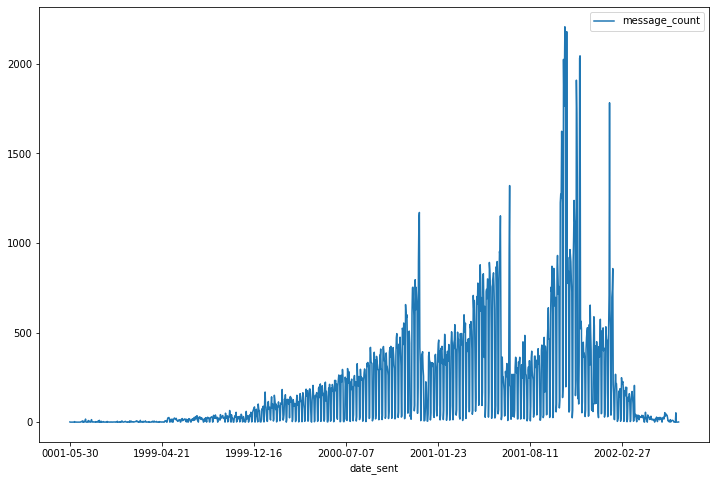

In [34]:

import matplotlib.pyplot as plt
message_df.plot(x = 'date_sent', y = 'message_count', figsize = (12,8))
plt.show()


In [35]:
sql = """
SELECT sender AS sender, count(mid) AS message_count
  FROM message
  GROUP BY sender
  ORDER BY message_count;
"""
rows = cur.execute(sql)
for row in rows :
  print(row)

Streaming output truncated to the last 5000 lines.
('dtran@energy.state.ca.us', 4)
('ectlon-ln1@enron.com', 4)
('ed.agner@enron.com', 4)
('ed.quinn@enron.com', 4)
('edgonzales@ev1.net', 4)
('editor@theb2bvoice.com', 4)
('editorial@mail.realtimetraders.com', 4)
('edmundg@manfinancial.com', 4)
('edward.terry@enron.com', 4)
('eharris@insightpartners.com', 4)
('eigcirculation@networkats.com', 4)
('eileen@pira.com', 4)
('eismail@energyinfosource.com', 4)
('ekao@uh.edu', 4)
('elaine.overturf@enron.com', 4)
('elizabeth.guffy@bakerbotts.com', 4)
('elizabeth.moore@enron.com', 4)
('ellis@haas.berkeley.edu', 4)
('elyse.kalmans@enron.com', 4)
('email@email.themoment.com', 4)
('email@martindale.com', 4)
('emca@yahoogroups.com', 4)
('emilio.vicens@enron.com', 4)
('employee.services@enron.com', 4)
('emy.geraldo@enron.com', 4)
('enronmediacuttings@enron.com', 4)
('eoria@nebar.com', 4)
('eric.ledain@enron.com', 4)
('eric.mcmurry@elpaso.com', 4)
('eric.shaw@enron.com', 4)
('erica.fields@enron.com', 4)
(

In [36]:
sql = """
SELECT sender AS sender, count(mid) AS message_count
  FROM message
  GROUP BY sender
  ORDER BY message_count;
"""
# Load the data into a DataFrame
email_df = pd.read_sql_query(sql,conn)
email_df

,sender,message_count
0,0_19619_e719a090-7eca-d011-9d39-0000f84121eb_u...,1
1,0_19653_e719a090-7eca-d011-9d39-0000f84121eb_u...,1
2,0_19812_e719a090-7eca-d011-9d39-0000f84121eb_u...,1
3,1.11176403.-3@multexinvestornetwork.com,1
4,1.11176403.999@multexinvestornetwork.com,1
...,...,...
17522,tana.jones@enron.com,4437
17523,sara.shackleton@enron.com,4797
17524,kay.mann@enron.com,5100
17525,j.kaminski@enron.com,5838


In [37]:
email_df.tail(10)

,sender,message_count
17517,debra.perlingiere@enron.com,2549
17518,matthew.lenhart@enron.com,2784
17519,enron.announcements@enron.com,2838
17520,no.address@enron.com,3511
17521,chris.germany@enron.com,3686
17522,tana.jones@enron.com,4437
17523,sara.shackleton@enron.com,4797
17524,kay.mann@enron.com,5100
17525,j.kaminski@enron.com,5838
17526,jeff.dasovich@enron.com,6273


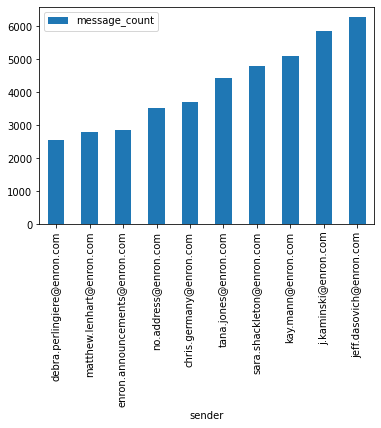

In [38]:
email_df.tail(10).plot(x = 'sender', y = 'message_count', kind = 'bar' )
plt.show()

##Analysis and Discussion 

The graph shows that there was a significant increase in emails being sent from the year 1999 all the way to end of the year in 2000. In 1998 Anthony Fastow was appointed as the finance chief then in the year 1999 he went on to create the first two partnership which were proposed to buy poor performing Enron assets and hedge risky investment, but this was all just a front to cover all the company’s debts and losses. The company’s directors also approved of Anthony Fastow’s plans for the partnership. In 2000 Enron share price reached an all-time high of usd90 after Fastow’s plan had been in action. At the end of the year 2000 Enron announced that Jeffrey Skilling will take over as CEO from Kenneth Lay for the coming year 2001 and that Kenneth Ley will remain as chair (NY Times, 2006). In January 2000 George Bush named Kenneth Ley as the advisor to the presidential transitional team then in that same year in September Kenneth Ley makes a contribution of USD 290,000 to George Bush’s presidential election campaign (Staff and agencies, 2006). This explains the increase in emails being sent during that time as they were trying to hide the Enron’s debts and inflated profits. Communications were being made through emails a lot often than before. There was a sudden rise again in 2001 and that year is where there were the highest emails per day were sent. In March Bethany McLean released an article that said is Enron overpriced which stated that investors did not know how Enron made the profits they reported. Aurthur Andersen who was Enron’s auditor was considering if they could keep Enron as an auditor due to the partnerships used to disguise debt. On August 6 months after Skillings was appointed CEO he resigned and Kenneth Lay because the CEO again. In October 2001 Enron reported a loss of USD618m its first quarterly loss and announced a USD1.2bn shareholder equity reduction. The SEC was also looking at a possibility of conflict of interest between Enron and its partnership. Antony Fastow is also sacked by Enron in October as well. Enron announces that it overstated profits by USD600m. Enron and Dynegy agree the acquisition of $9bn but Dynegy pulls out of the deal due to Enron’s risk. IN December Enron filed for bankruptcy. In January 2002 Lay resigns as CEO and chairman (Staff and agencies, 2006). There were high number of emails during that time because there was a lot of uncertainty with Enron that they needed to reassure their investors that everything was under control. Investors were worried about their money and Enron was also trying to keep its clients and investors happy in October 2001 that is where there were the most emails sent ever because of the losses they reported and also the SEC investigating them and investors and everyone involved with Enron was worried and needed answers.
From the data frame and the graph that has been plotted the top 10 emailers are shown there and one of them have no name of the emailer and is the seventh highest top emailer. There is also Enron announcement as part of the emailers which could be expected to be there because the company had to give its clients regular announcement updates as well as reassurances on what was going on with the company. The emailer with the highest emails sent was Jeff Dasovich who was the government relations executive for Enron (Analyzing Keywords in Enron’s Email, 2013).


## Conclusion

The downfall of Enron was its leadership. Its leadership system was corrupt and greedy which lead to them having a desire to just get results no matter the case even if it means disregarding their integrity. Employees of the company were now heavily involved in unethical practises driven by the need to get results rather than maintain their ethics and integrity. Enron should have implemented a culture that accommodates ideas which are not driven by the pressure of giving a quick fix to a problem. The leadership should have put in place ethical policies that they should follow themselves and lead by example.

## References

 Analyzing Keywords in Enron’s Email. (2013, November 24). Rodger’s Notes. https://rodgersnotes.wordpress.com/2013/11/24/analyzing-keywords-in-enrons-email/

 Chen, J. (2019). Enron. Investopedia. https://www.investopedia.com/terms/e/enron.asp
 
Forbes. (2002). Enron The Incredible. Forbes. https://www.forbes.com/2002/01/15/0115enron.html?sh=3c3f6bf43c9c

 NY Times. (2006, January 18). Timeline: A chronology of Enron Corp. The New York Times. https://www.nytimes.com/2006/01/18/business/worldbusiness/timeline-a-chronology-of-enron-corp.html
 
 Segal, T. (2021, November 26). Enron scandal: The fall of a Wall Street darling. Investopedia. https://www.investopedia.com/updates/enron-scandal-summary/
 
 Staff and agencies. (2006, January 30). Timeline: Enron. The Guardian; The Guardian. https://www.theguardian.com/business/2006/jan/30/corporatefraud.enron